In [2]:
# Let`s import all packages that we may need:

import sys
import numpy as np  # linear algebra
from scipy.stats import randint
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt  # this is used for the plot the graph 
import seaborn as sns  # used for plot interactive graph. 
from sklearn.model_selection import train_test_split  # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler  # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline  # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics  # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error, r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
from keras.callbacks import EarlyStopping
#from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers import Conv1D
from keras.layers import MaxPooling1D
from keras.layers import Dropout

## Data can be downloaded from: http://archive.ics.uci.edu/ml/machine-learning-databases/00235/
## Just open the zip file and grab the file 'household_power_consumption.txt' put it in the directory 
## that you would like to run the code. 


2023-10-13 14:00:24.295084: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 14:00:24.446936: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-13 14:00:24.447924: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-13 14:00:25.528997: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [26]:

df = pd.read_csv('../input/INMET_SE_RJ_A618_TERESOPOLIS-PARQUE NACIONAL_01-01-2022_A_31-12-2022.CSV', sep=';',
                 parse_dates={'dt': ['Data', 'Hora UTC']}, infer_datetime_format=True, 
                 low_memory=False, decimal=',', na_values=['nan','?'], index_col='dt',
                 skiprows=8, encoding='ISO-8859-1')
#df = df[df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] >= 0]

/tmp/ipykernel_317010/1603930020.py:1: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('../input/INMET_SE_RJ_A618_TERESOPOLIS-PARQUE NACIONAL_01-01-2022_A_31-12-2022.CSV', sep=';',


,"PRECIPITAÇÃO TOTAL, HORÁRIO (mm)","PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)",PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB),PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB),RADIACAO GLOBAL (Kj/m²),"TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)",TEMPERATURA DO PONTO DE ORVALHO (°C),TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C),TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C),TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C),UMIDADE REL. MAX. NA HORA ANT. (AUT) (%),UMIDADE REL. MIN. NA HORA ANT. (AUT) (%),"UMIDADE RELATIVA DO AR, HORARIA (%)","VENTO, DIREÇÃO HORARIA (gr) (° (gr))","VENTO, RAJADA MAXIMA (m/s)","VENTO, VELOCIDADE HORARIA (m/s)",Unnamed: 19
dt,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00+00:00,3.2,903.0,903.4,902.1,0.0,17.8,15.6,19.3,17.8,16.9,15.4,91.0,81.0,87.0,271.0,10.8,3.4,NaN
2022-01-01 01:00:00+00:00,0.8,903.3,903.4,902.9,0.0,17.8,16.0,18.6,17.2,16.6,15.6,93.0,85.0,89.0,277.0,10.8,2.7,NaN
2022-01-01 02:00:00+00:00,0.4,902.8,903.9,902.7,0.0,17.3,14.4,18.6,17.1,16.4,14.1,90.0,77.0,83.0,272.0,12.1,3.4,NaN
2022-01-01 03:00:00+00:00,0.0,901.8,902.9,901.7,0.2,19.9,16.3,20.0,17.1,16.4,14.4,86.0,79.0,80.0,285.0,10.2,2.4,NaN
2022-01-01 04:00:00+00:00,0.0,901.5,902.0,901.5,0.2,20.4,16.7,20.9,19.9,16.8,16.5,81.0,77.0,79.0,271.0,9.3,2.7,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 19:00:00+00:00,0.0,906.6,906.9,906.4,602.9,22.0,19.1,22.1,21.5,20.4,19.1,93.0,84.0,84.0,245.0,3.7,0.3,NaN
2022-12-31 20:00:00+00:00,0.6,906.7,906.9,906.6,261.5,20.6,19.7,22.1,20.5,20.0,19.0,95.0,83.0,95.0,238.0,2.0,0.0,NaN
2022-12-31 21:00:00+00:00,0.2,907.0,907.2,906.7,43.6,19.3,18.5,20.6,19.3,19.8,18.4,95.0,93.0,95.0,237.0,3.2,0.4,NaN


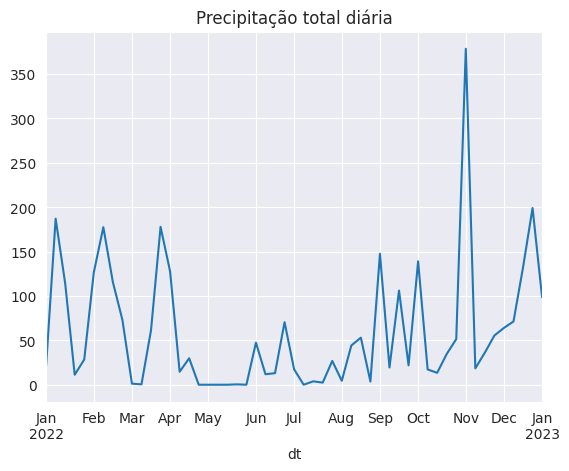

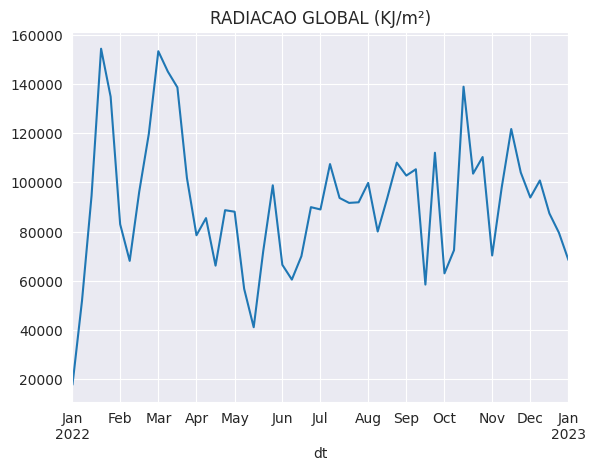

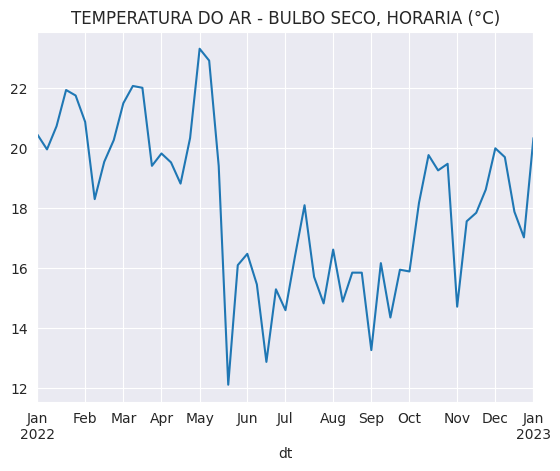

In [30]:
df['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].resample('W').sum().plot(title='Precipitação total diária')
plt.show()
df['RADIACAO GLOBAL (Kj/m²)'].resample('W').sum().plot(title='RADIACAO GLOBAL (KJ/m²)')
plt.show()
df['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].resample('W').mean().plot(title='TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)')
plt.show()